In [72]:
import pandas as pd
import glob
from sqlalchemy import create_engine, text


doacoes_candidato = pd.read_csv('receitas_candidatos_2014_BR.txt',
                                sep=';', encoding='latin_1',
                                dtype={'CNPJ Prestador Conta': str, 'CPF do candidato': str,
                                       'CPF/CNPJ do doador': str, 'CPF/CNPJ do doador originário': str},
                                thousands='.', decimal=',',
                                low_memory=False, na_values=['#NULO', -1])



In [73]:
doacoes_candidato.columns = ['cod_eleicao', 'desc_eleicao', 'data_hora',
                             'cnpj_prestador_conta', 'sequencial_candidato',
                             'uf', 'sigla_partido', 'num_candidato', 'cargo',
                             'nome_candidato', 'cpf_candidato', 'num_recibo_eleitoral',
                             'num_documento', 'cpf_cnpj_doador', 'nome_doador',
                             'nome_doador_receita', 'sigla_ue_doador', 'num_partido_doador',
                             'num_candidato_doador', 'cod_setor_econ_doador',
                             'setor_econ_doador', 'data_receita', 'valor_receita',
                             'tipo_receita', 'fonte_recurso', 'especie_recurso',
                             'desc_receita', 'cpf_cnpj_doador_originario',
                             'nome_doador_originario', 'tipo_doador_originario',
                             'setor_econ_doador_originario', 'nome_doador_originario_rf']

In [74]:
doacoes_aecio = doacoes_candidato[doacoes_candidato.cpf_candidato == '13326724691']

In [75]:
doacoes_aecio = doacoes_aecio[['cpf_cnpj_doador', 'nome_doador','data_hora',
                                     'nome_doador_receita', 'sigla_ue_doador', 'cod_setor_econ_doador', 'setor_econ_doador', 'valor_receita',
                                     'tipo_receita', 'tipo_receita', 'fonte_recurso', 'especie_recurso',
                                     'desc_receita', 'cpf_cnpj_doador_originario',
                                     'nome_doador_originario', 'tipo_doador_originario',
                                     'setor_econ_doador_originario', 'nome_doador_originario_rf']]


In [76]:
doacoes_aecio_pf = doacoes_aecio[doacoes_aecio.tipo_doador_originario == 'F']

In [77]:
doacoes_aecio_pj = doacoes_aecio[doacoes_aecio.tipo_doador_originario == 'J']

In [78]:
doacoes_aecio_nan = doacoes_aecio[doacoes_aecio.tipo_doador_originario.isnull(
)]

In [79]:
def sum_doacoes_cpfcnpj(doacoes):
    """Função que retorna um DataFrame com a soma das doações agregadas por CPF/CNPJ e nome do doador"""
    doacoes_agrupadas = doacoes.groupby(['cpf_cnpj_doador', 'nome_doador_receita'])[
        'valor_receita'].sum().to_frame(name='valor_doado').sort_values('valor_doado', ascending=False)
    return doacoes_agrupadas


def limpa_doacoes_partido(doacoes):
    """Retorna um DataFrame sem doações vindas de instiuções partidárias (direção, comitê, outros candidatos etc)"""
    doacoes_limpas = (~doacoes['nome_doador_receita'].str.contains('Direção', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('Comitê', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('ELEIÇÃO', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('ELEIÇAO', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('ELEICAO', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('ELEIÇÕES', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('ELEIÇOES', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('ELEICOES', na=False) &
                      ~doacoes['nome_doador_receita'].str.contains('PARTIDO', na=False))
    doacoes = doacoes[doacoes_limpas == True]
    return doacoes

In [80]:
doacoes_aecio_nan = limpa_doacoes_partido(doacoes_aecio_nan)
doacoes_aecio_nan = sum_doacoes_cpfcnpj(doacoes_aecio_nan)


In [81]:
doacoes_aecio_nan

,,valor_doado
cpf_cnpj_doador,nome_doador_receita,
02916265000160,JBS S/A,54000000.0
17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0
73410326000160,CERVEJARIA PETROPOLIS S/A,17500000.0
14310577003049,CONSTRUTORA OAS S.A.,10000000.0
14811848000105,OAS S.A.,10000000.0
77955532000107,CONSTRUTORA TRIUNFO S/A,9000000.0
44023661000108,U T C ENGENHARIA S/A,7500000.0
18725804000113,TELEMONT ENGENHARIA DE TELECOMUNICACOES S/A,7500000.0
56228356000131,CRBS S/A,7500000.0


In [82]:
doacoes_aecio_nan_top20 = doacoes_aecio_nan[0:20]
doacoes_aecio_nan_top20 = doacoes_aecio_nan_top20.reset_index()


(-1.101030136726394,
 1.1002274863305979,
 -1.1011287701380852,
 1.1096154005143521)

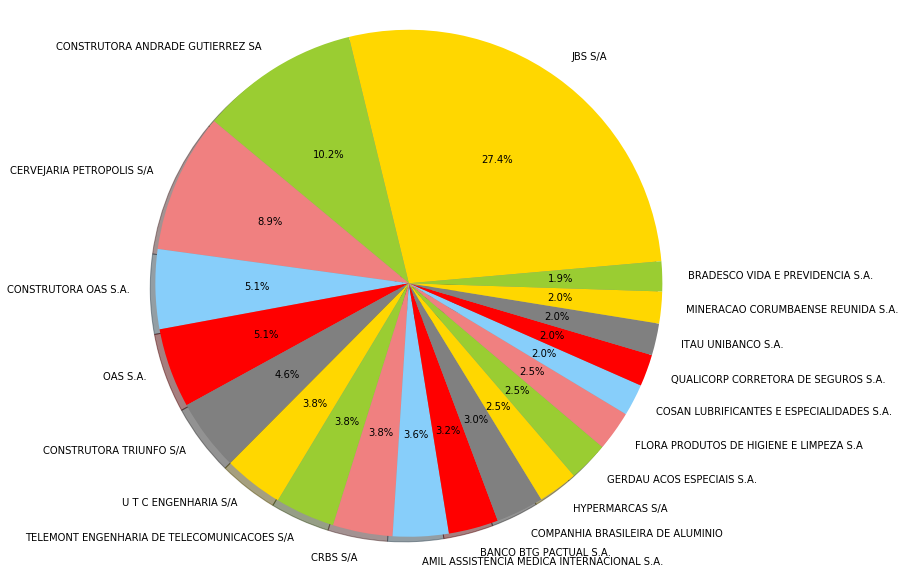

In [48]:
index = doacoes_aecio_nan_top20['nome_doador_receita'].tolist()
valor_doado = doacoes_aecio_nan_top20['valor_doado'].tolist()

import matplotlib.pyplot as plt
 
# Data to plot
labels = index
sizes = valor_doado
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','gray']
explode = (0, 0, 0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0,0,0)  # explode 1st slice

plt = plt.figure(figsize=[10, 10])
plt = plt.add_subplot(111)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=5,labeldistance=1.1)


plt.axis('equal')


In [12]:
string = ','.join([x for x in doacoes_aecio_nan_top20['cpf_cnpj_doador'].tolist()])

In [13]:
string

'02916265000160,17262213000194,73410326000160,14310577003049,14811848000105,77955532000107,44023661000108,18725804000113,56228356000131,29309127000179,30306294000145,61409892000173,02932074000191,07359641000186,08505736000123,33000092000169,07755207000115,60701190000104'

In [83]:
query = """
    SELECT  cnpj_empresa,
            tipo_socio,
            cpf_cnpj_socio,
            qualificacao_socio,
            nome_socio,
            unidade_federativa
    FROM socios
    WHERE cnpj_empresa IN
    ('02916265000160',
'17262213000194',
'73410326000160',
'14310577003049',
'14811848000105',
'77955532000107',
'44023661000108',
'18725804000113',
'56228356000131',
'29309127000179',
'30306294000145',
'61409892000173',
'02932074000191',
'07359641000186',
'08505736000123',
'33000092000169',
'07755207000115',
'60701190000104',
'03327988000196',
'51990695000137')
    """

In [84]:
engine = create_engine('sqlite:////home/bruno/socios-brasil/output/socios-brasil.sqlite')

socios = pd.read_sql(query, con=engine)



In [85]:
doacoes_aecio_nan_top20_query = doacoes_aecio_nan_top20.merge(socios, how='left', left_on='cpf_cnpj_doador',
                                right_on='cnpj_empresa')



In [86]:
doacoes_aecio_nan_top20_query

,cpf_cnpj_doador,nome_doador_receita,valor_doado,cnpj_empresa,tipo_socio,cpf_cnpj_socio,qualificacao_socio,nome_socio,unidade_federativa
0,02916265000160,JBS S/A,54000000.0,02916265000160,Pessoa Física,,Diretor,JEREMIAH ALPHONSUS O CALLAGHAN,São Paulo
1,02916265000160,JBS S/A,54000000.0,02916265000160,Pessoa Física,,Diretor,ELISEO SANTIAGO PEREZ FERNANDEZ,São Paulo
2,02916265000160,JBS S/A,54000000.0,02916265000160,Pessoa Física,,Presidente,JOSE BATISTA SOBRINHO,São Paulo
3,02916265000160,JBS S/A,54000000.0,02916265000160,Pessoa Física,,Diretor,WESLEY MENDONCA BATISTA FILHO,São Paulo
4,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0,17262213000194,Pessoa Física,,Diretor,ROBERTO JOSE RODRIGUES,Minas Gerais
5,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0,17262213000194,Pessoa Física,,Diretor,CLORIVALDO BISINOTO,Minas Gerais
6,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0,17262213000194,Pessoa Física,,Diretor,LUIS CESAR MOREIRA,Minas Gerais
7,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0,17262213000194,Pessoa Física,,Diretor,GUSTAVO BRAGA MERCHER COUTINHO,Minas Gerais
8,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0,17262213000194,Pessoa Física,,Diretor,FERNANDO LEYSER GONCALVES,Minas Gerais
9,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,20000000.0,17262213000194,Pessoa Física,,Diretor,MARCELO MARCANTE,Minas Gerais


In [87]:
doacoes_aecio_nan_top20 = doacoes_aecio_nan_top20_query[['cpf_cnpj_doador','nome_doador_receita','valor_doado','nome_socio','qualificacao_socio','unidade_federativa']]

In [89]:
doacoes_aecio_nan_top20.to_csv('dilma.txt',sep=';')

In [21]:
doacoes_aecio_nan_top20['valor_doado'] = doacoes_aecio_nan_top20['valor_doado'].map('{:,.0f}'.format)

/home/bruno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
doacoes_aecio_nan_top20

,cpf_cnpj_doador,nome_doador_receita,valor_doado,nome_socio,qualificacao_socio,unidade_federativa
0,02916265000160,JBS S/A,"54,000,000",JEREMIAH ALPHONSUS O CALLAGHAN,Diretor,São Paulo
1,02916265000160,JBS S/A,"54,000,000",ELISEO SANTIAGO PEREZ FERNANDEZ,Diretor,São Paulo
2,02916265000160,JBS S/A,"54,000,000",JOSE BATISTA SOBRINHO,Presidente,São Paulo
3,02916265000160,JBS S/A,"54,000,000",WESLEY MENDONCA BATISTA FILHO,Diretor,São Paulo
4,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,"20,000,000",ROBERTO JOSE RODRIGUES,Diretor,Minas Gerais
5,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,"20,000,000",CLORIVALDO BISINOTO,Diretor,Minas Gerais
6,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,"20,000,000",LUIS CESAR MOREIRA,Diretor,Minas Gerais
7,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,"20,000,000",GUSTAVO BRAGA MERCHER COUTINHO,Diretor,Minas Gerais
8,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,"20,000,000",FERNANDO LEYSER GONCALVES,Diretor,Minas Gerais
9,17262213000194,CONSTRUTORA ANDRADE GUTIERREZ SA,"20,000,000",MARCELO MARCANTE,Diretor,Minas Gerais
